In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

In [2]:
# (1)~(3) 데이터 가져오기

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
df_X.shape                             
df_X = np.delete(df_X, 1 , axis = 1)
df_X.shape 

(442, 9)

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes['target'] = df_y
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
diabetes.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Figure size 1000x800 with 0 Axes>

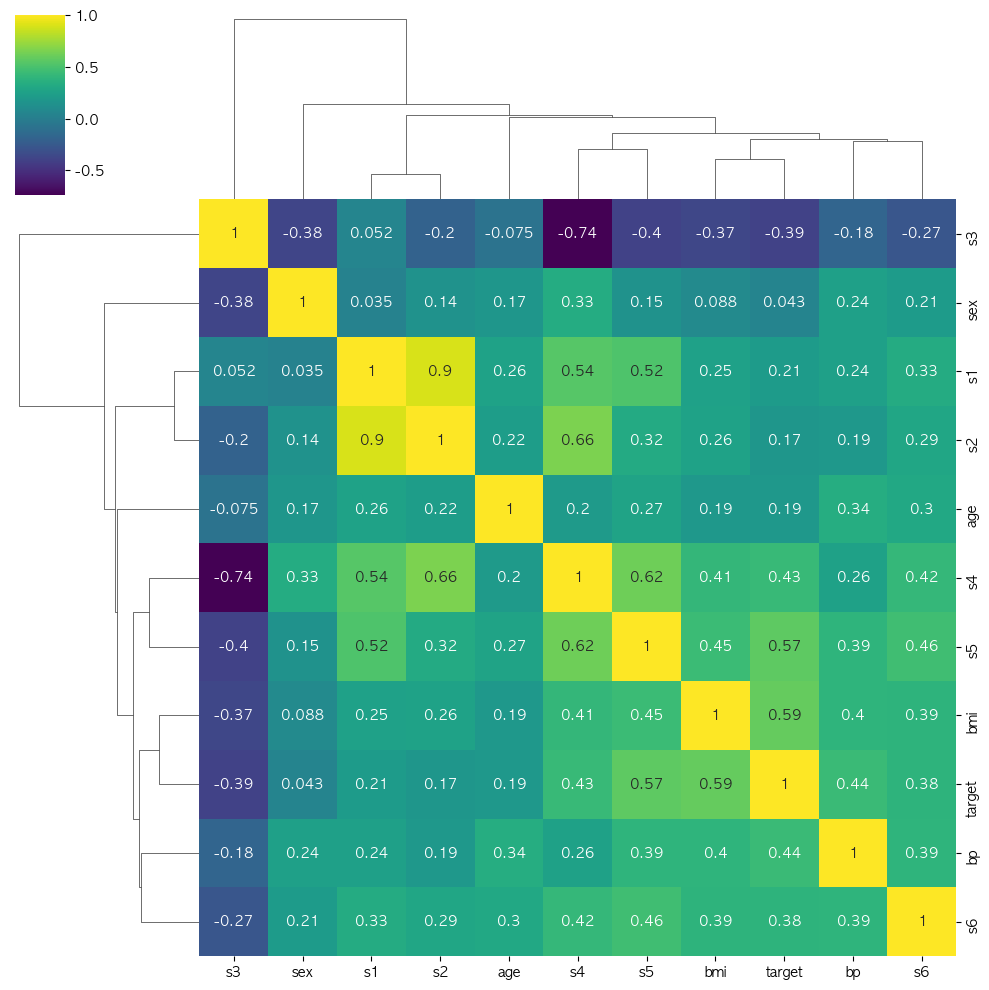

In [8]:
plt.figure(figsize=(10,8))
sns.clustermap(diabetes.corr(), annot=True, cmap='viridis');
# 유사도가 높은 것들 순서대로 계층적으로 클러스터(Hierarchical Clustering)가 형성

In [9]:
del diabetes['sex']   
del diabetes['s3']
diabetes.head()

,age,bmi,bp,s1,s2,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,-0.002592,-0.031988,-0.046641,135.0


In [10]:
# (4) train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 9) (353,)
(89, 9) (89,)


In [11]:
# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# 모델 함수를 구현해주세요.

W = np.random.rand(9)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [12]:
# (6) 손실함수 loss 정의하기
# 손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [13]:
# (7) 기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    N = len(y)                            # N은 데이터 포인트의 개수
    y_pred = model(X, W, b)               # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)    # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()          # b의 gradient 계산
    return dW, db

In [14]:
# dW, db = gradient(X, W, b, y)
# print("dW:", dW)
# print("db:", db)

In [15]:
# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률, learning rate 를 설정해주세요
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

LEARNING_RATE = 0.1

In [16]:
# (9) 모델 학습하기
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6273.6005
Iteration 20 : Loss 5949.2174
Iteration 30 : Loss 5890.4466
Iteration 40 : Loss 5836.2931
Iteration 50 : Loss 5783.6994
Iteration 60 : Loss 5732.5831
Iteration 70 : Loss 5682.8978
Iteration 80 : Loss 5634.5988
Iteration 90 : Loss 5587.6430
Iteration 100 : Loss 5541.9885
Iteration 110 : Loss 5497.5950
Iteration 120 : Loss 5454.4233
Iteration 130 : Loss 5412.4355
Iteration 140 : Loss 5371.5949
Iteration 150 : Loss 5331.8661
Iteration 160 : Loss 5293.2148
Iteration 170 : Loss 5255.6077
Iteration 180 : Loss 5219.0126
Iteration 190 : Loss 5183.3983
Iteration 200 : Loss 5148.7349
Iteration 210 : Loss 5114.9930
Iteration 220 : Loss 5082.1444
Iteration 230 : Loss 5050.1619
Iteration 240 : Loss 5019.0189
Iteration 250 : Loss 4988.6899
Iteration 260 : Loss 4959.1501
Iteration 270 : Loss 4930.3754
Iteration 280 : Loss 4902.3426
Iteration 290 : Loss 4875.0293
Iteration 300 : Loss 4848.4137
Iteration 310 : Loss 4822.4747
Iteration 320 : Loss 4797.1919
Iteration 330 : L

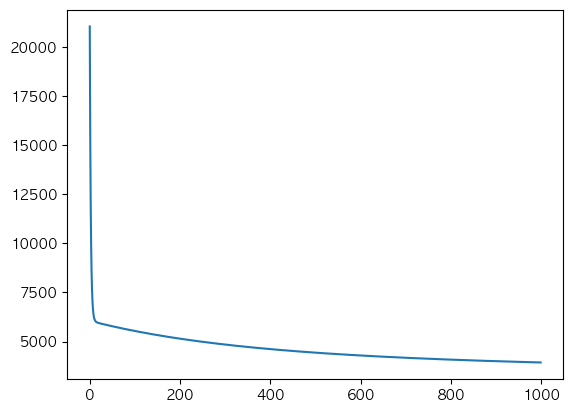

In [17]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [18]:
W, b

(array([  63.81872635,  -45.53531542,  212.61327299,   36.68891552,
          11.76552375, -163.51758178,  154.86261253,  245.5937411 ,
         153.6895017 ]),
 152.62583427997225)

In [19]:
# (10) test 데이터에 대한 성능 확인하기
# test 데이터에 대한 성능을 확인해주세요.

prediction = model(X_test, W, b)
prediction
mse = loss(X_test, W, b, y_test)
mse

3439.2440363490623

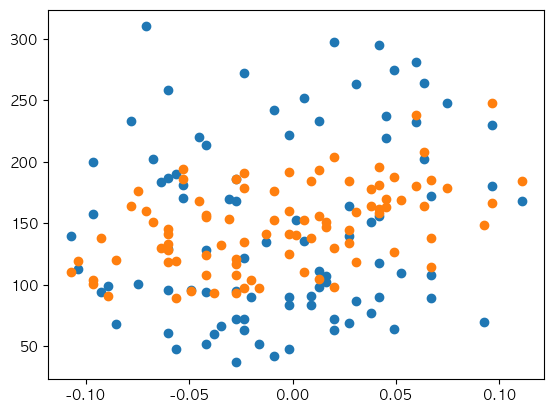

In [20]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [21]:
print(X_test[:, 0])

[ 0.04534098  0.09256398  0.06350368  0.09619652  0.01264814  0.0090156
 -0.00914709 -0.02367725 -0.09269548 -0.06000263 -0.04183994  0.00538306
 -0.08906294  0.01991321 -0.01277963 -0.03457486  0.04170844  0.06350368
 -0.03094232  0.04897352 -0.07090025  0.04897352 -0.04183994  0.05987114
 -0.06000263  0.04170844  0.03081083  0.03807591 -0.05637009  0.01628068
  0.02717829 -0.10359309 -0.00188202  0.02717829  0.09619652 -0.07816532
 -0.00914709 -0.00188202  0.06713621  0.01991321 -0.00188202  0.06713621
  0.04170844  0.11072668  0.04170844 -0.01641217 -0.09632802  0.03081083
 -0.02004471 -0.06000263  0.00538306 -0.09632802  0.02717829  0.01991321
 -0.05273755 -0.02730979 -0.02367725  0.03807591 -0.02730979 -0.0382074
 -0.02367725 -0.04183994 -0.06000263  0.01628068 -0.04183994  0.07440129
 -0.05273755  0.05260606 -0.10722563 -0.06726771 -0.07453279 -0.00188202
  0.05987114 -0.06000263  0.06713621  0.0090156  -0.02730979 -0.04547248
  0.04534098  0.01264814 -0.0854304  -0.05637009 -0.0